In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train = pd.read_csv("Train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284740 entries, 0 to 284739
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284740 non-null  int64  
 1   StockCode    284740 non-null  int64  
 2   Description  284740 non-null  int64  
 3   Quantity     284740 non-null  int64  
 4   InvoiceDate  284740 non-null  object 
 5   UnitPrice    284740 non-null  float64
 6   CustomerID   284740 non-null  int64  
 7   Country      284740 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 17.4+ MB


In [5]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,7289,1092,3283,4300,27-05-2011 10:52,0.72,13135,35
1,3110,959,1129,3906,22-02-2011 10:43,0.82,18087,35
2,9591,108,1163,3186,19-07-2011 17:04,0.06,14609,35
3,1692,356,1168,3114,11-01-2011 12:55,2.10,15749,35
4,5463,356,1168,3114,18-04-2011 13:20,2.10,15749,35


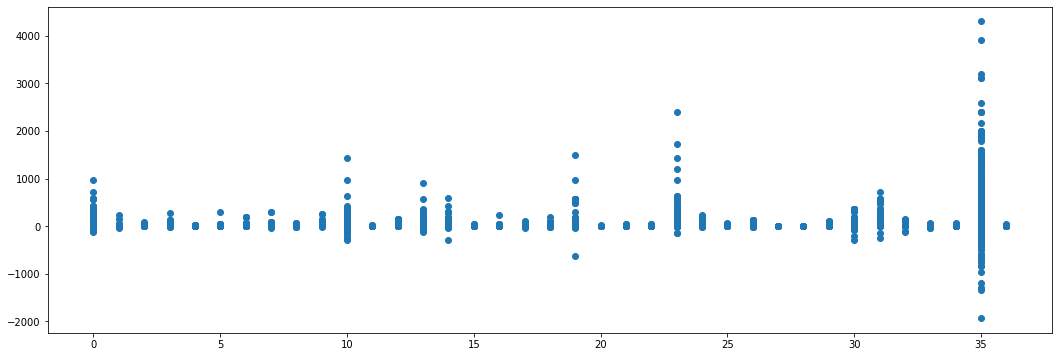

In [6]:
plt.figure(figsize=(18,6))
plt.scatter(x=train.Country, y=train['Quantity'])

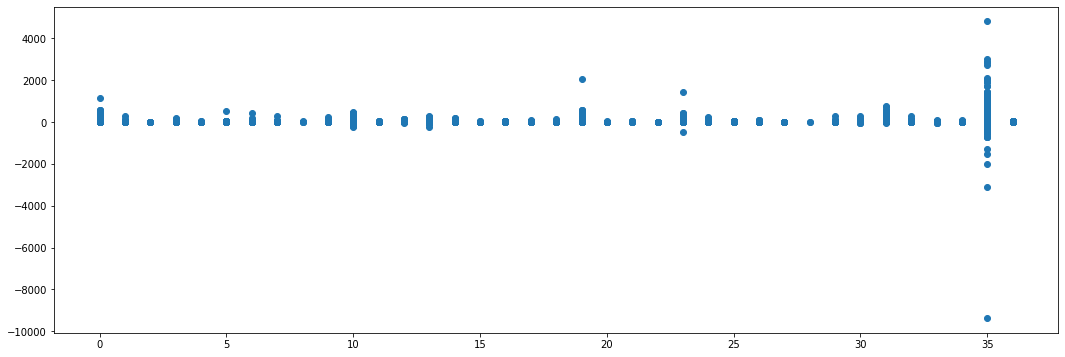

In [7]:
plt.figure(figsize=(18,6))
plt.scatter(x=test.Country, y=test['Quantity'])

In [8]:
train = pd.get_dummies(train, columns=['Country'], prefix='co')
test = pd.get_dummies(test, columns=['Country'], prefix='co')

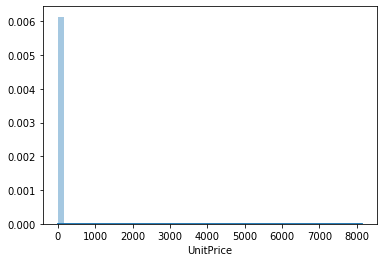

In [9]:
sns.distplot(train.UnitPrice)

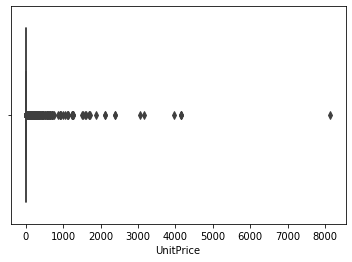

In [10]:
sns.boxplot(train.UnitPrice)

In [11]:
train['UP'] = np.log(train['UnitPrice'])

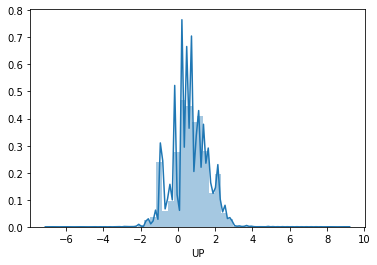

In [12]:
sns.distplot(train.UP)

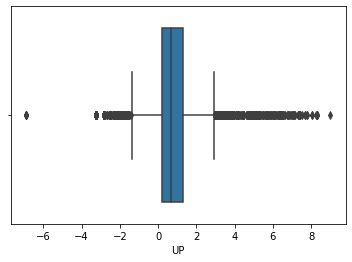

In [13]:
sns.boxplot(train.UP)

In [14]:
from datetime import datetime
train['Year'] = pd.to_datetime(train['InvoiceDate']).dt.year
train['Month'] = pd.to_datetime(train['InvoiceDate']).dt.month
train['Date'] = pd.to_datetime(train['InvoiceDate']).dt.day

In [15]:
test['Year'] = pd.to_datetime(test['InvoiceDate']).dt.year
test['Month'] = pd.to_datetime(test['InvoiceDate']).dt.month
test['Date'] = pd.to_datetime(test['InvoiceDate']).dt.day

In [16]:
train.drop('InvoiceDate',axis = 1)
test.drop('InvoiceDate',axis = 1)

,InvoiceNo,StockCode,Description,Quantity,CustomerID,co_0,co_1,co_2,co_3,co_4,...,co_30,co_31,co_32,co_33,co_34,co_35,co_36,Year,Month,Date
0,3139,1709,1079,3,16161.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,2,22
1,617,510,3457,1,17341.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2010,12,8
2,14653,604,694,36,15158.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,10,25
3,8634,1478,3473,2,16033.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,6,27
4,15546,3216,871,1,15351.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,15214.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,6,9
122045,8694,3069,217,16,16200.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,6,28
122046,915,1419,3474,6,15555.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2010,12,13
122047,8156,1631,1434,1,15907.0,0,0,0,0,0,...,0,0,0,0,0,1,0,2011,6,16


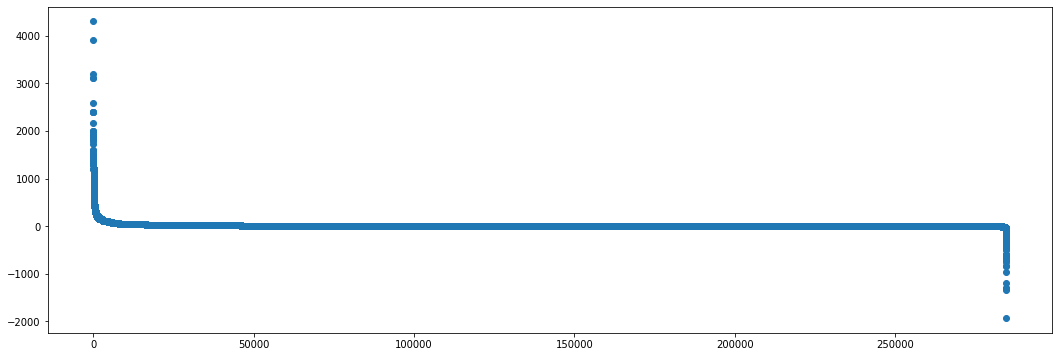

In [17]:
plt.figure(figsize=(18,6))
plt.scatter(x=train.index, y=train['Quantity'])

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text xticklabel objects>)

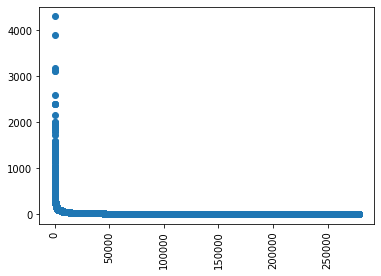

In [18]:
df_quantile = train[train['Quantity'] > 0]
plt.scatter(x=df_quantile.index, y=df_quantile['Quantity'])
plt.xticks(rotation=90)

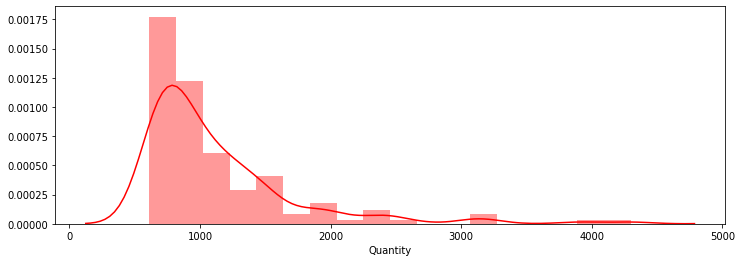

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] >600]['Quantity'], kde=True, color='red')

In [20]:
bins_q = pd.IntervalIndex.from_tuples([(-9500, -250), (-250, -12), (-12, -3), (-3, -1), (0, 2), (2, 24),(24,500),(500,5000)])
train['QuantityRange'] = pd.cut(train['Quantity'], bins=bins_q)

In [21]:
test['QuantityRange'] = pd.cut(test['Quantity'], bins=bins_q)

In [22]:
test['QuantityRange'].isnull().sum()
train['QuantityRange'].isnull().sum()

0

In [23]:
train2 = train.copy()
train2 = pd.get_dummies(train, columns=['QuantityRange'], prefix='qr')

In [24]:
test2 = test.copy()
test2 = pd.get_dummies(test, columns=['QuantityRange'], prefix='qr')

In [25]:
train2 = train2.drop(["Quantity","InvoiceDate","InvoiceNo","Date"],axis = 1)
test2 = test2.drop(["Quantity","InvoiceDate","InvoiceNo","Date"],axis = 1)

In [26]:
train2.head()

,StockCode,Description,UnitPrice,CustomerID,co_0,co_1,co_2,co_3,co_4,co_5,...,Year,Month,"qr_(-9500, -250]","qr_(-250, -12]","qr_(-12, -3]","qr_(-3, -1]","qr_(0, 2]","qr_(2, 24]","qr_(24, 500]","qr_(500, 5000]"
0,1092,3283,0.72,13135,0,0,0,0,0,0,...,2011,5,0,0,0,0,0,0,0,1
1,959,1129,0.82,18087,0,0,0,0,0,0,...,2011,2,0,0,0,0,0,0,0,1
2,108,1163,0.06,14609,0,0,0,0,0,0,...,2011,7,0,0,0,0,0,0,0,1
3,356,1168,2.10,15749,0,0,0,0,0,0,...,2011,11,0,0,0,0,0,0,0,1
4,356,1168,2.10,15749,0,0,0,0,0,0,...,2011,4,0,0,0,0,0,0,0,1


In [27]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
train2['Month'] = pd.cut(train2['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
test2['Month'] = pd.cut(test2['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])

In [28]:
train2.head()

,StockCode,Description,UnitPrice,CustomerID,co_0,co_1,co_2,co_3,co_4,co_5,...,Year,Month,"qr_(-9500, -250]","qr_(-250, -12]","qr_(-12, -3]","qr_(-3, -1]","qr_(0, 2]","qr_(2, 24]","qr_(24, 500]","qr_(500, 5000]"
0,1092,3283,0.72,13135,0,0,0,0,0,0,...,2011,"(3, 6]",0,0,0,0,0,0,0,1
1,959,1129,0.82,18087,0,0,0,0,0,0,...,2011,"(0, 3]",0,0,0,0,0,0,0,1
2,108,1163,0.06,14609,0,0,0,0,0,0,...,2011,"(6, 9]",0,0,0,0,0,0,0,1
3,356,1168,2.10,15749,0,0,0,0,0,0,...,2011,"(9, 12]",0,0,0,0,0,0,0,1
4,356,1168,2.10,15749,0,0,0,0,0,0,...,2011,"(3, 6]",0,0,0,0,0,0,0,1


In [29]:
train3 = train2.copy()
train3 = pd.get_dummies(train2, columns=['Month'], prefix='mr')
test3 = test2.copy()
test3 = pd.get_dummies(test2, columns=['Month'], prefix='mr')

In [30]:
train3.head()

,StockCode,Description,UnitPrice,CustomerID,co_0,co_1,co_2,co_3,co_4,co_5,...,"qr_(-12, -3]","qr_(-3, -1]","qr_(0, 2]","qr_(2, 24]","qr_(24, 500]","qr_(500, 5000]","mr_(0, 3]","mr_(3, 6]","mr_(6, 9]","mr_(9, 12]"
0,1092,3283,0.72,13135,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,959,1129,0.82,18087,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,108,1163,0.06,14609,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,356,1168,2.10,15749,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,356,1168,2.10,15749,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
train3['Year']= le.fit_transform(train3['Year'])
test3['Year']= le.fit_transform(test3['Year'])

In [32]:
train3.head()

,StockCode,Description,UnitPrice,CustomerID,co_0,co_1,co_2,co_3,co_4,co_5,...,"qr_(-12, -3]","qr_(-3, -1]","qr_(0, 2]","qr_(2, 24]","qr_(24, 500]","qr_(500, 5000]","mr_(0, 3]","mr_(3, 6]","mr_(6, 9]","mr_(9, 12]"
0,1092,3283,0.72,13135,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,959,1129,0.82,18087,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,108,1163,0.06,14609,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,356,1168,2.10,15749,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,356,1168,2.10,15749,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [33]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

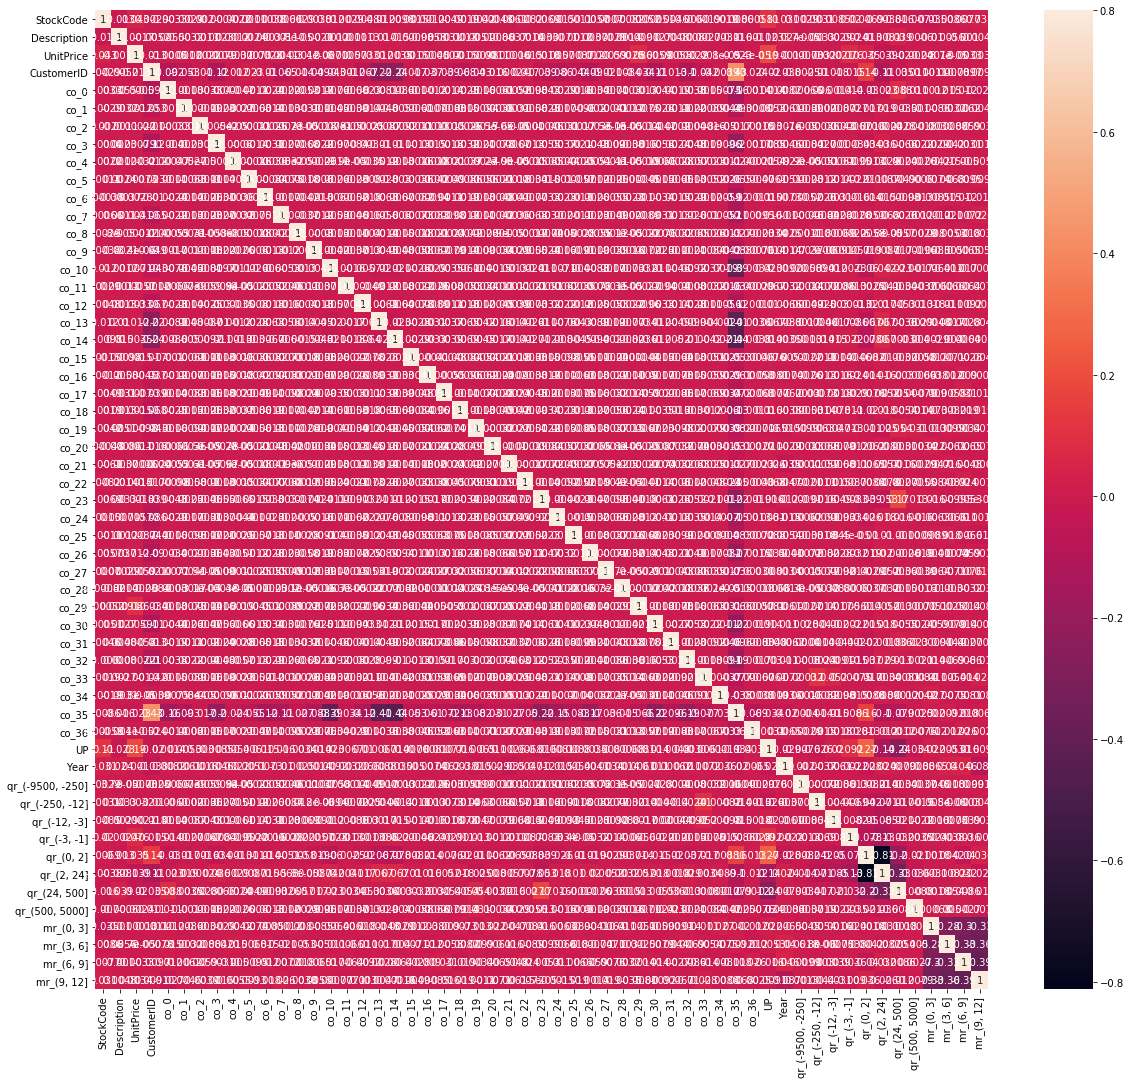

In [34]:
corr_matrix = train3.corr()
f , ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [35]:
reg = LinearRegression()
x_train = train3.drop(["UP","UnitPrice"],axis = 1)
y_train = train3["UP"]
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred_log = reg.predict(test3)

In [37]:
y_pred = np.exp(y_pred_log)

In [38]:
output = pd.DataFrame({'UnitPrice': y_pred})
output.to_csv('my_submission.csv', index=False)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors = 3,weights = 'distance', p=1)
clf.fit(x_train, y_train)  
y_pred_knn = clf.predict(test3)

In [40]:
y_pred_knnf = np.exp(y_pred_knn)

In [41]:
print(clf.score(x_train, y_train))

0.9986851547902946


In [42]:
output = pd.DataFrame({'UnitPrice': y_pred})
output.to_csv('my_submission_knn.csv', index=False)

In [44]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred_rf = random_forest.predict(test3)
y_pred_rf = np.exp(y_pred_knn)

In [48]:
output = pd.DataFrame({'UnitPrice': y_pred})
output.to_csv('my_submission_rf.csv', index=False)